In [1]:
!pip install konlpy

     |████████████████████████████████| 19.4 MB 7.4 MB/s 
     |████████████████████████████████| 448 kB 88.3 MB/s 


In [4]:
import re
import urllib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

from konlpy.tag import Okt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [5]:
train_file = urllib.request.urlopen('https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt')

test_file = urllib.request.urlopen('https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt')

train_data = pd.read_table(train_file)
test_data = pd.read_table(test_file)

In [6]:
train_data.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [10]:
# 중복 및 결측치 

print(train_data['document'].nunique())
print(train_data['label'].nunique())

train_data.drop_duplicates(subset=['document'],inplace=True)

146182
2


In [14]:
#결측치 확인
print(train_data.isnull().sum())
train_data = train_data.dropna(how='any')

id          0
document    1
label       0
dtype: int64


In [28]:
# 데이터 정제

train_data['document'] = train_data['document'].str.replace('[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]','')
train_data[:10]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


,id,document,label
0,9976970,아 더빙 진짜 짜증나네요 목소리,0
1,3819312,흠 포스터보고 초딩영화줄 오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 솔직히 재미는 없다 평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화 스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
5,5403919,막 걸음마 뗀 세부터 초등학교 학년생인 살용영화 ㅋㅋㅋ 별반개도 아까움,0
6,7797314,원작의 긴장감을 제대로 살려내지못했다,0
7,9443947,별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지 정말 발로해도 그것보단...,0
8,7156791,액션이 없는데도 재미 있는 몇안되는 영화,1
9,5912145,왜케 평점이 낮은건데 꽤 볼만한데 헐리우드식 화려함에만 너무 길들여져 있나,1


In [29]:
train_data['document'].replace('',np.nan,inplace=True )
print(len(train_data))
print(train_data.isnull().sum())

146156
id          0
document    0
label       0
dtype: int64


In [30]:
train_data= train_data.dropna(how='any')
print(len(train_data))

146156


test_data로 수행하기(중복, 클리닝, 결측치)

In [31]:
# 중복 및 결측치 

print(test_data['document'].nunique())
print(test_data['label'].nunique())

test_data.drop_duplicates(subset=['document'],inplace=True)

48822
2


In [32]:
#결측치 확인
print(test_data.isnull().sum())
test_data = test_data.dropna(how='any')

id          0
document    0
label       0
dtype: int64


In [22]:
# 데이터 정제

test_data['document'] = test_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣]"," ")
test_data[:10]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,,0
2,8544678,뭐야 이 평점들은 나쁘진 않지만 점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임 돈주고 보기에는,0
4,6723715,만 아니었어도 별 다섯 개 줬을텐데 왜 로 나와서 제 심기를 불편하게 하죠,0
5,7898805,음악이 주가 된 최고의 음악영화,1
6,6315043,진정한 쓰레기,0
7,6097171,마치 미국애니에서 튀어나온듯한 창의력없는 로봇디자인부터가 고개를 젖게한다,0
8,8932678,갈수록 개판되가는 중국영화 유치하고 내용없음 폼잡다 끝남 말도안되는 무기에 유치한 ...,0
9,6242223,이별의 아픔뒤에 찾아오는 새로운 인연의 기쁨 모든 사람이 그렇지는 않네,1


In [23]:
test_data['document'].replace('',np.nan,inplace=True )
print(len(test_data))
print(test_data.isnull().sum())

49157
id          0
document    0
label       0
dtype: int64


In [24]:
test_data= test_data.dropna(how='any')
print(len(test_data))

49157


토큰화 및 불용어 제거

https://gist.github.com/spikeekips/40eea22ef4a89f629abd87eed535ac6a

In [ ]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']


okt = Okt()
X_train = []
for sentence in train_data['document']:
  X_train.append([word for word in okt.morphs(sentence) if not word in stopwords])

In [ ]:
print(X_train[3])

In [ ]:
X_test = []
for sentence in test_data['document']:
  X_test.append([word for word in okt.morphs(sentence) if not word in stopwords])

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train) 
print(tokenizer.word_index)

In [ ]:
tokenizer.word_index['잇몸']

In [56]:
from pandas.io.parquet import read_parquet
# 빈도 수가 낮은 단어 제거
threshold = 3
words_cnt = len(tokenizer.word_index)
rare_cnt = 0 
words_freq = 0
rare_freq = 0

for key, value in tokenizer.word_counts.items():
  words_freq = words_freq + value
  if value < threshold:
    rare_cnt += 1
    rare_freq = rare_freq + value

print("전체 단어 수:", words_cnt)
print(f'빈도가 {threshold-1} 이하인 희귀 단어 수: {rare_cnt}')
print(f'희귀 단어 비율: {(rare_cnt/words_cnt)*100}')
print(f'희귀 단어 등장 빈도 비율: {(rare_freq/words_freq)*100}')


전체 단어 수: 0
빈도가 2 이하인 희귀 단어 수: 0


ZeroDivisionError: ignored

In [44]:
vocab_size = words_cnt - rare_cnt + 2

In [49]:
tokenizer = Tokenizer(vocab_size,oov_token='OOV')
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

AttributeError: ignored

In [50]:
y_train = np.array(train_data['label'])
y_test = np.array(test_data['label'])

In [51]:
drop_train = [index for index,sentence in enumerate(X_train) if len(sentence) <  1]
X_train = np.delete(X_train, drop_train, axis=0)
y_train = np.delete(y_train,drop_train, axis=0)
print(len(X_train))
print(len(y_train))

145382
145382


/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)


In [52]:
# 패딩
print('리뷰 최대 길이:',max(len(I) for I in X_train ))
print('리뷰 평균 길이:',sum(map(len,X_train))/len(X_train))

리뷰 최대 길이: 74
리뷰 평균 길이: 11.238722813002985


Text(0, 0.5, 'Number of Samples')

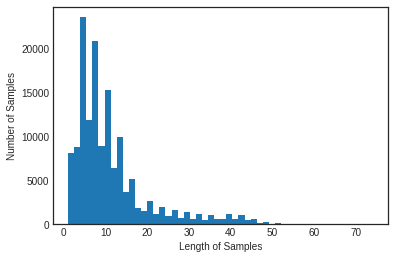

In [53]:
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('Length of Samples')
plt.ylabel('Number of Samples')

In [54]:
max_len = 60
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

ValueError: ignored

In [ ]:
from tensorflow.keras.layers import Embedding, Dense, LSTM, GRU
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Embedding(vocab_size, 100))
model.add(GRU(128))
model.add(Dense(1,activation='sigmoid'))